In [ ]:
!pip install skorch
!pip install torch==1.4.0


In [ ]:
import pandas as pd 
import numpy as np 
from skorch import NeuralNetBinaryClassifier
import torch.nn as nn
import torch
from sklearn.model_selection import cross_val_score
print(torch.__version__)


1.4.0


In [ ]:
!ls

entradas_breast.csv  saidas_breast.csv	sample_data


In [ ]:
np.random.seed(123)
torch.manual_seed(123)

In [ ]:
previsores = pd.read_csv("entradas_breast.csv")
classe = pd.read_csv("saidas_breast.csv")

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


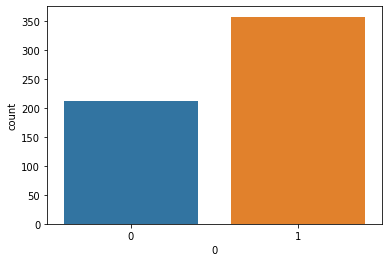

In [ ]:
sns.countplot(classe['0']);

In [ ]:
previsores = np.array(previsores, dtype='float32')
classe = np.array(classe,dtype='float32').squeeze(1) # removi a dimensal 1 

In [ ]:
classe.shape

(569,)

In [ ]:
type(previsores)

numpy.ndarray

In [ ]:
type(classe)

numpy.ndarray

# Class Model Torch

In [ ]:
class clf_torch(nn.Module):
  # skort precisa
  def __init__(self):
    super().__init__()
     # 30 => 16 => 16 => 1
    self.dense0 = nn.Linear(30,16)
    torch.nn.init.uniform_(self.dense0.weight)
    self.activation = nn.ReLU()
    self.dense1 = nn.Linear(16,16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()
    self.dense2 = nn.Linear(16,1)
    torch.nn.init.uniform_(self.dense2.weight)
     
    self.output = nn.Sigmoid()

  def forward(self, X): 
    X = self.dense0(X)
    X = self.activation(X)
    X = self.dense1(X)
    X = self.activation1(X)

    X = self.dense2(X)
    X = self.output(X)
    return X 


In [ ]:
## Skorch

# Classificador Sklearn com Skorch

In [ ]:
clf_sklearn = NeuralNetBinaryClassifier(module=clf_torch,
                                        criterion=torch.nn.BCELoss,
                                        optimizer=torch.optim.Adam,
                                        lr=0.001,
                                        optimizer__weight_decay=0.0001,
                                        max_epochs=100,
                                        batch_size=10,
                                        train_split=False)

In [ ]:
resultados = cross_val_score(clf_sklearn, previsores, classe, cv = 10, scoring= 'accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1       10.2537  0.0852
      2       10.2537  0.0800
      3       10.2537  0.0803
      4       10.2537  0.0811
      5       10.2537  0.0831
      6       10.2537  0.0873
      7       10.2537  0.0808
      8       10.2537  0.0819
      9       10.2537  0.0784
     10       10.2537  0.0815
     11       10.2537  0.0922
     12       10.2537  0.0955
     13       10.2537  0.0789
     14       10.2537  0.0813
     15       10.2537  0.0833
     16       10.2537  0.0822
     17       10.2537  0.0839
     18       10.2537  0.0770
     19       10.2537  0.0774
     20       10.2537  0.0828
     21       10.2537  0.0824
     22       10.2537  0.0798
     23       10.2537  0.0884
     24        3.6051  0.0828
     25        0.5006  0.0808
     26        0.4687  0.0800
     27        0.4491  0.0847
     28        0.4318  0.0806
     29        0.4156  0.0814
     30        0.3969  0.0792
     31        0.3807  0.0864
     32   

IndexError: ignored

In [ ]:
resultados.shape

(10,)

In [ ]:
resultados

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])